In [688]:
%load_ext autoreload
%autoreload 2

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

from data_prep import data_manager as DM

# instanciate a new datamanager 
dm = DM.Data_Manager()
dm.data_loader()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## NaN Values

In [689]:
print("--------------train observed----------------")
print(dm.X_train_observed_a.isnull().sum()[dm.X_train_observed_a.isnull().sum() > 0]/ dm.X_train_observed_a.shape[0])
print("--------------train estimated---------------")
print(dm.X_train_estimated_a.isnull().sum()[dm.X_train_estimated_a.isnull().sum() > 0]/ dm.X_train_estimated_a.shape[0])
print("---------------test estimated---------------")
print(dm.X_test_estimated_a.isnull().sum()[dm.X_test_estimated_a.isnull().sum() > 0]/ dm.X_test_estimated_a.shape[0])

--------------train observed----------------
ceiling_height_agl:m    0.187471
cloud_base_agl:m        0.067971
snow_density:kgm3       0.977045
dtype: float64
--------------train estimated---------------
ceiling_height_agl:m    0.222975
cloud_base_agl:m        0.119140
snow_density:kgm3       0.897189
dtype: float64
---------------test estimated---------------
ceiling_height_agl:m    0.275347
cloud_base_agl:m        0.103472
snow_density:kgm3       1.000000
dtype: float64


In [690]:
print("--------------train observed----------------")
print(dm.X_train_observed_b.isnull().sum()[dm.X_train_observed_b.isnull().sum() > 0]/ dm.X_train_observed_b.shape[0])
print("--------------train estimated---------------")
print(dm.X_train_estimated_b.isnull().sum()[dm.X_train_estimated_b.isnull().sum() > 0]/ dm.X_train_estimated_b.shape[0])
print("---------------test estimated---------------")
print(dm.X_test_estimated_b.isnull().sum()[dm.X_test_estimated_b.isnull().sum() > 0]/ dm.X_test_estimated_b.shape[0])

--------------train observed----------------
ceiling_height_agl:m    0.160542
cloud_base_agl:m        0.063911
snow_density:kgm3       0.951013
dtype: float64
--------------train estimated---------------
ceiling_height_agl:m    0.209888
cloud_base_agl:m        0.111686
snow_density:kgm3       0.894003
dtype: float64
---------------test estimated---------------
ceiling_height_agl:m    0.262153
cloud_base_agl:m        0.096181
snow_density:kgm3       1.000000
dtype: float64


In [691]:
print("--------------train observed----------------")
print(dm.X_train_observed_c.isnull().sum()[dm.X_train_observed_c.isnull().sum() > 0] / dm.X_train_observed_c.shape[0])
print("--------------train estimated---------------")
print(dm.X_train_estimated_c.isnull().sum()[dm.X_train_estimated_c.isnull().sum() > 0] / dm.X_train_estimated_c.shape[0])
print("---------------test estimated---------------")
print(dm.X_test_estimated_c.isnull().sum()[dm.X_test_estimated_c.isnull().sum() > 0] / dm.X_test_estimated_c.shape[0])

--------------train observed----------------
ceiling_height_agl:m    0.170537
cloud_base_agl:m        0.072861
snow_density:kgm3       0.920976
dtype: float64
--------------train estimated---------------
ceiling_height_agl:m    0.261493
cloud_base_agl:m        0.159536
snow_density:kgm3       0.790737
dtype: float64
---------------test estimated---------------
ceiling_height_agl:m    0.294792
cloud_base_agl:m        0.130208
snow_density:kgm3       1.000000
dtype: float64


Can see that all test_estimated sets have 100% of snow density as missing. 
In addidtion, all training sets have high percentage missing snow density, therefore this is removed. 

In [692]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_density:kgm3", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_density:kgm3", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_density:kgm3", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_density:kgm3", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_density:kgm3", axis=1)


From dataset website we see that the value -666 is injected when no measurement is possible. We suspect this being the nan values we see, however the high percentage of ceiling_height_agl:m we dont want to inject back -666 for all missing values. We remove this feature because of this uncertanty.  

In [693]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("ceiling_height_agl:m", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("ceiling_height_agl:m", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("ceiling_height_agl:m", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("ceiling_height_agl:m", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("ceiling_height_agl:m", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("ceiling_height_agl:m", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("ceiling_height_agl:m", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("ceiling_height_agl:m", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("ceiling_height_agl:m", axis=1)

We keep cloud_base_agl:m for now, looking into the possibility of it being useful later on. However, to continue witout the missing values we inject -667. 

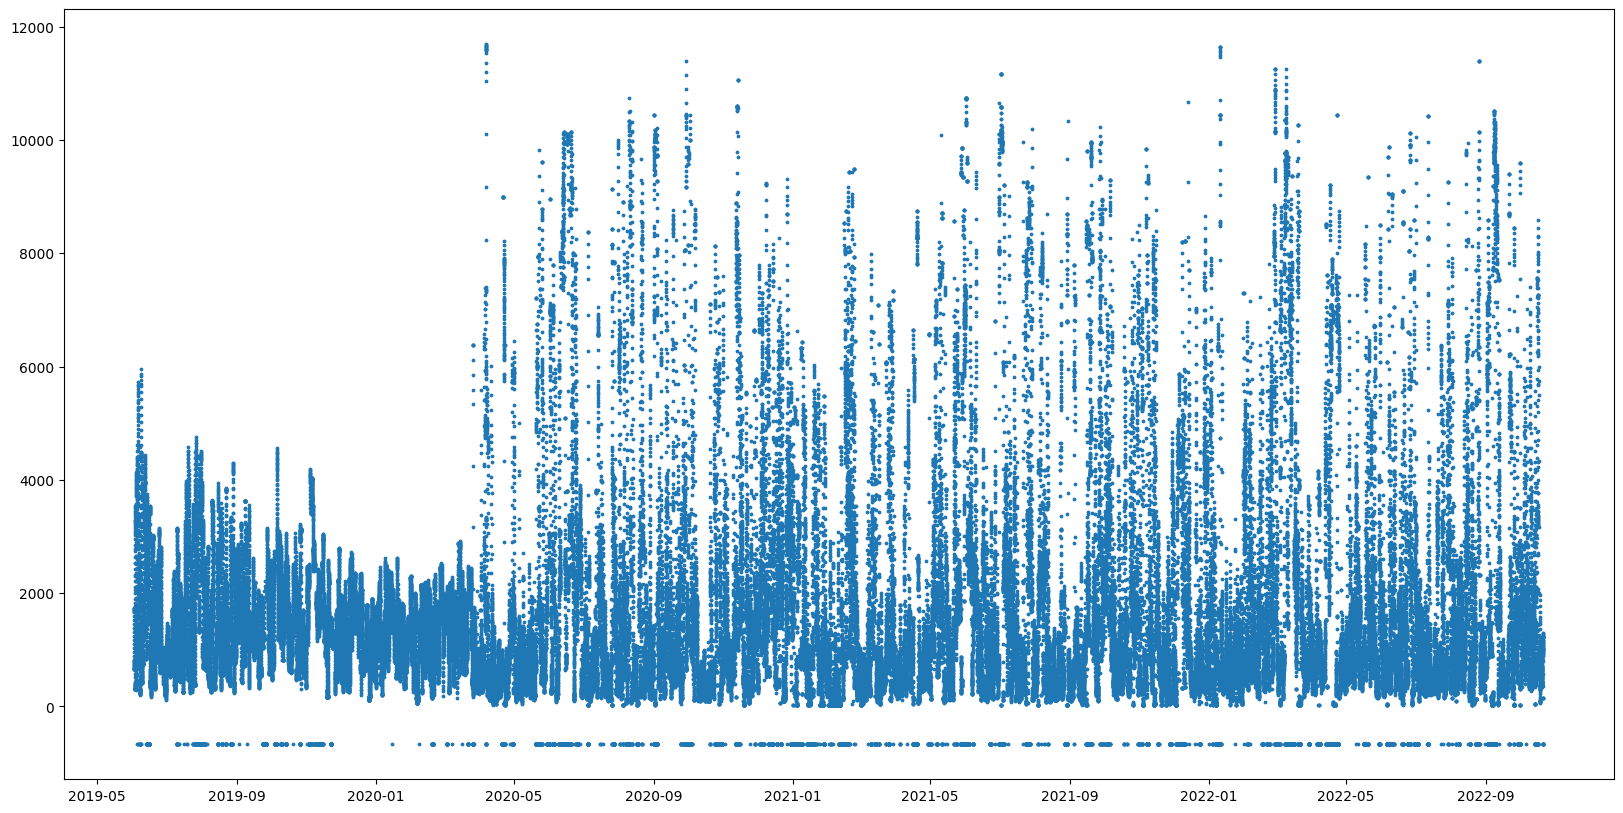

In [694]:

dm.X_train_observed_a["cloud_base_agl:m"][dm.X_train_observed_a["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_a["cloud_base_agl:m"][dm.X_train_estimated_a["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_a["cloud_base_agl:m"][dm.X_test_estimated_a["cloud_base_agl:m"].isna()] = -667

dm.X_train_observed_b["cloud_base_agl:m"][dm.X_train_observed_b["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_b["cloud_base_agl:m"][dm.X_train_estimated_b["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_b["cloud_base_agl:m"][dm.X_test_estimated_b["cloud_base_agl:m"].isna()] = -667

dm.X_train_observed_c["cloud_base_agl:m"][dm.X_train_observed_c["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_c["cloud_base_agl:m"][dm.X_train_estimated_c["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_c["cloud_base_agl:m"][dm.X_test_estimated_c["cloud_base_agl:m"].isna()] = -667


dm.plot_feature(dm.X_train_observed_a, "cloud_base_agl:m")

As we kan see, the row line at the bottom is the injected values. 

We note the sudden change in amplitude

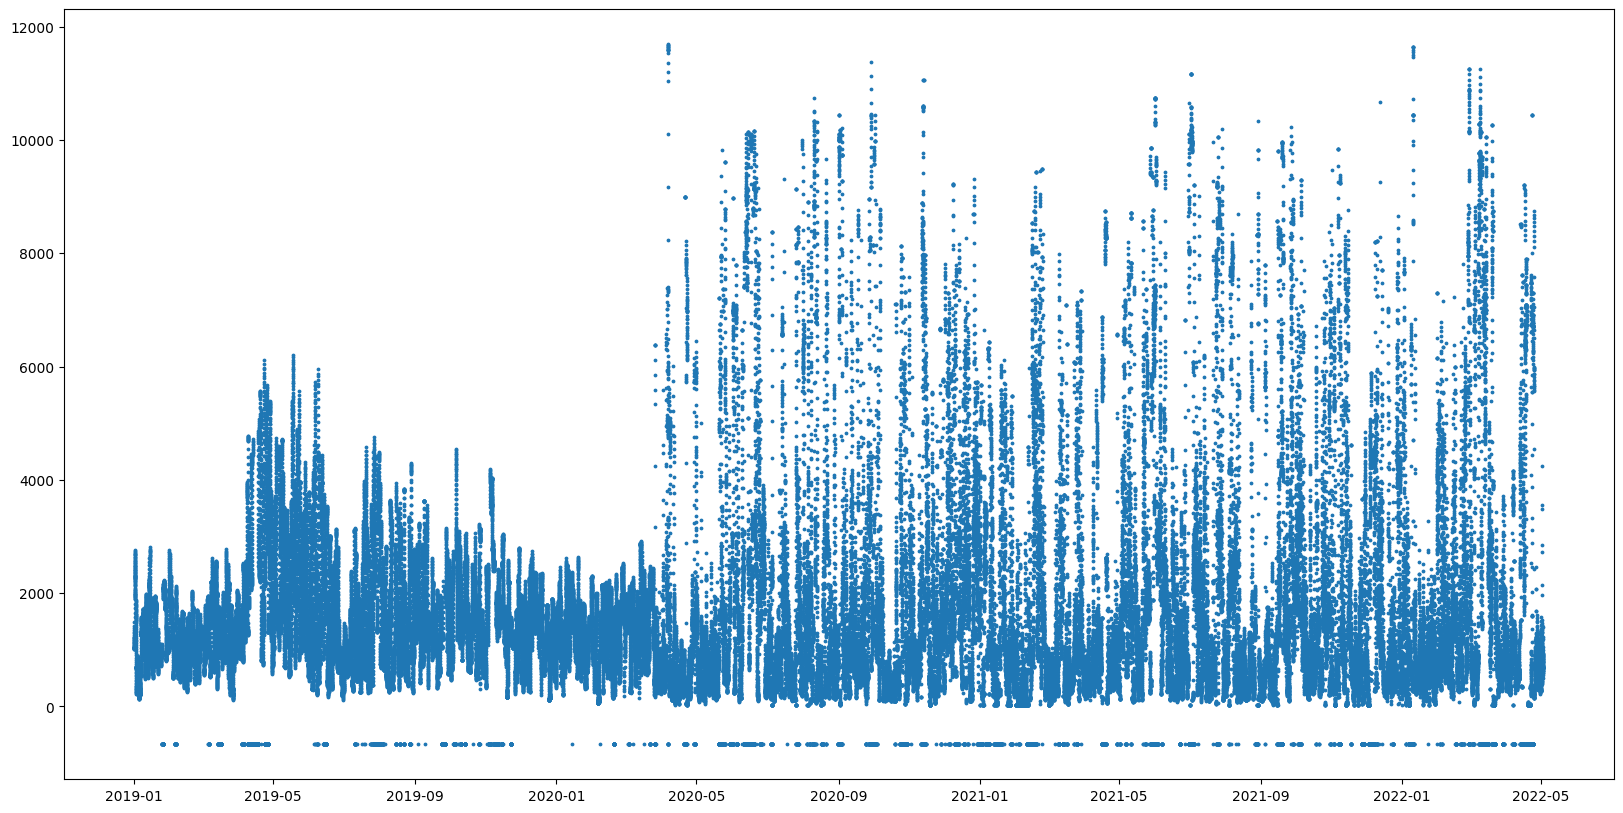

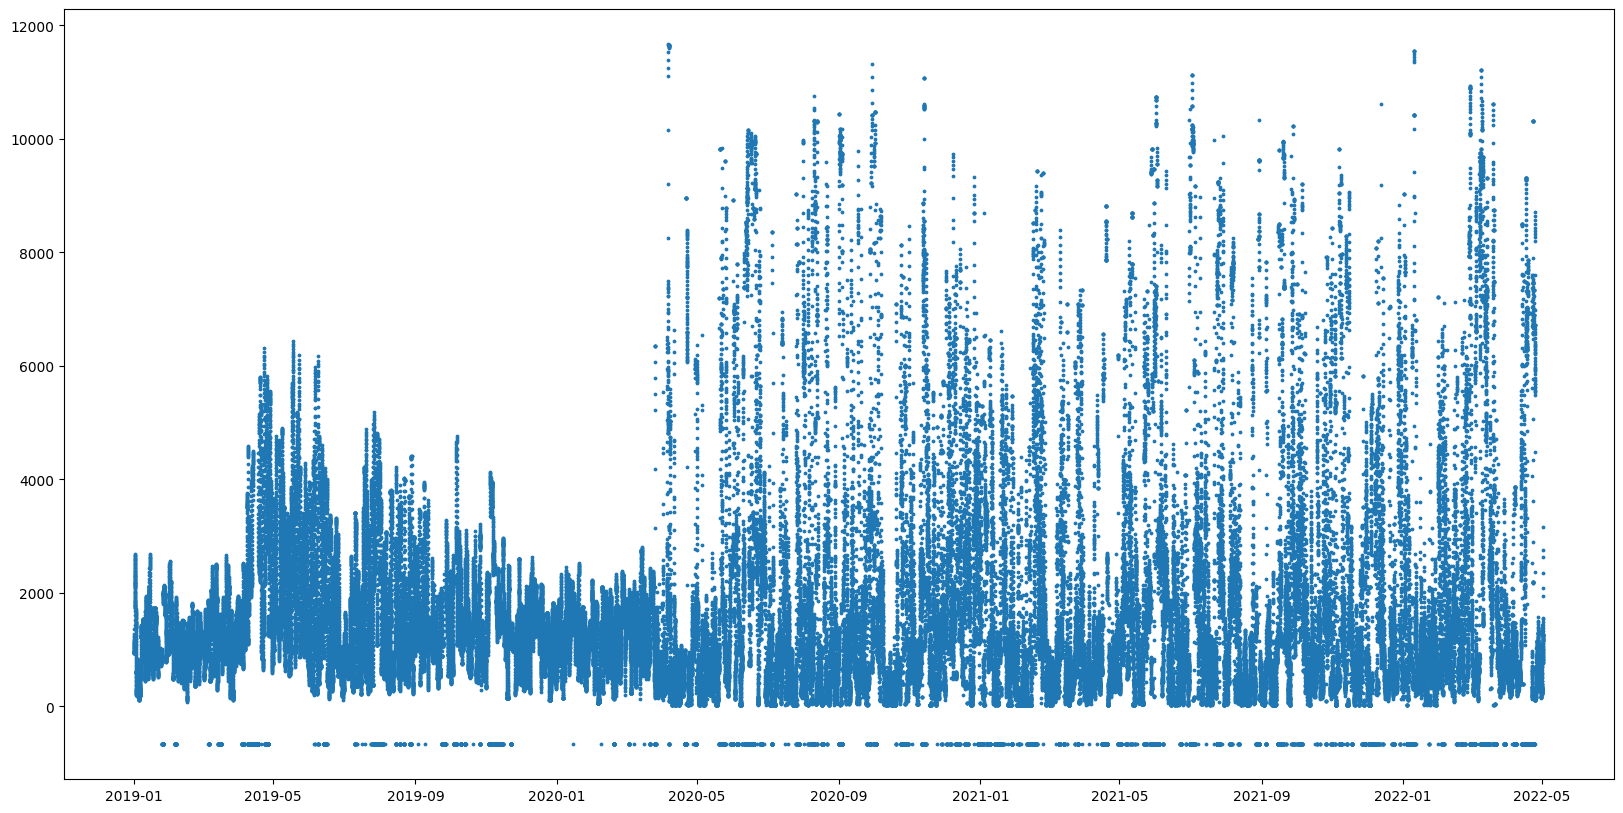

In [695]:
dm.plot_feature(dm.X_train_observed_b, "cloud_base_agl:m")
dm.plot_feature(dm.X_train_observed_c, "cloud_base_agl:m")

We note the amplitude change in all sets. 

## Looking at columns, what do we need? 

If a column isnt giving us any information about the problem, we can remove for simplicity. 

We look at the amount of 0 in the set. As this does not neccesarily mean no information and must be evaluated on a per-feature basis. 

In [696]:
#observed A zeros
print([dm.X_train_observed_a[dm.X_train_observed_a == 0].count(axis=0)/(dm.X_train_observed_a.shape[0])])

[date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.436946
clear_sky_rad:W                   0.478769
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.963259
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.478954
diffuse_rad_1h:J                  0.436989
direct_rad:W                      0.545231
direct_rad_1h:J                   0.488291
effective_cloud_cover:p           0.031988
elevation:m                       0.000000
fresh_snow_12h:cm                 0.973472
fresh_snow_1h:cm                  0.994009
fresh_snow_24h:cm                 0.954858
fresh_snow_3h:cm                  0.989087
fresh_snow_6h:cm                  0.983627
is_day:idx                        0.478609
is_in_shadow:idx                  0.488350
msl_pressure:hPa                  0.000000
precip_5min:mm                    0.931043
precip_typ

In [697]:
#estimated A zeros
print([dm.X_train_estimated_a[dm.X_train_estimated_a == 0].count(axis=0)/(dm.X_train_estimated_a.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.609126
clear_sky_rad:W                   0.650888
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.950842
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.651001
diffuse_rad_1h:J                  0.609126
direct_rad:W                      0.726900
direct_rad_1h:J                   0.680189
effective_cloud_cover:p           0.054563
elevation:m                       0.000000
fresh_snow_12h:cm                 0.839213
fresh_snow_1h:cm                  0.953232
fresh_snow_24h:cm                 0.771734
fresh_snow_3h:cm                  0.922849
fresh_snow_6h:cm                  0.888769
is_day:idx                        0.650774
is_in_shadow:idx                  0.304620
msl_pressure:hPa                  0.000000
precip_5mi

In [698]:
#test A zeros
print([dm.X_test_estimated_a[dm.X_test_estimated_a == 0].count(axis=0)/(dm.X_test_estimated_a.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.164583
clear_sky_rad:W                   0.206597
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.965278
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.206944
diffuse_rad_1h:J                  0.164583
direct_rad:W                      0.293403
direct_rad_1h:J                   0.225694
effective_cloud_cover:p           0.047569
elevation:m                       0.000000
fresh_snow_12h:cm                 0.999306
fresh_snow_1h:cm                  0.999653
fresh_snow_24h:cm                 0.999306
fresh_snow_3h:cm                  0.999306
fresh_snow_6h:cm                  0.999306
is_day:idx                        0.206250
is_in_shadow:idx                  0.774653
msl_pressure:hPa                  0.000000
precip_5mi

In [699]:
#observed B zeros
print([dm.X_train_observed_b[dm.X_train_observed_b == 0].count(axis=0)/(dm.X_train_observed_b.shape[0])]) 

[date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.463025
clear_sky_rad:W                   0.504870
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.986163
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.504999
diffuse_rad_1h:J                  0.463050
direct_rad:W                      0.567703
direct_rad_1h:J                   0.514150
effective_cloud_cover:p           0.037074
elevation:m                       0.000000
fresh_snow_12h:cm                 0.962824
fresh_snow_1h:cm                  0.990114
fresh_snow_24h:cm                 0.940562
fresh_snow_3h:cm                  0.983460
fresh_snow_6h:cm                  0.976037
is_day:idx                        0.504691
is_in_shadow:idx                  0.461340
msl_pressure:hPa                  0.000000
precip_5min:mm                    0.945180
precip_typ

In [700]:
#estimated B zeros
print([dm.X_train_estimated_b[dm.X_train_estimated_b == 0].count(axis=0)/(dm.X_train_estimated_b.shape[0])]) 

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.609183
clear_sky_rad:W                   0.650888
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.976730
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.651001
diffuse_rad_1h:J                  0.609183
direct_rad:W                      0.725990
direct_rad_1h:J                   0.678880
effective_cloud_cover:p           0.055132
elevation:m                       0.000000
fresh_snow_12h:cm                 0.848657
fresh_snow_1h:cm                  0.958807
fresh_snow_24h:cm                 0.786299
fresh_snow_3h:cm                  0.928994
fresh_snow_6h:cm                  0.894743
is_day:idx                        0.650831
is_in_shadow:idx                  0.305701
msl_pressure:hPa                  0.000000
precip_5mi

In [701]:
#test B zeros
print([dm.X_test_estimated_b[dm.X_test_estimated_b == 0].count(axis=0)/(dm.X_test_estimated_b.shape[0])]) 

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.164583
clear_sky_rad:W                   0.206597
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.972222
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.206944
diffuse_rad_1h:J                  0.164583
direct_rad:W                      0.294444
direct_rad_1h:J                   0.229514
effective_cloud_cover:p           0.047569
elevation:m                       0.000000
fresh_snow_12h:cm                 1.000000
fresh_snow_1h:cm                  1.000000
fresh_snow_24h:cm                 1.000000
fresh_snow_3h:cm                  1.000000
fresh_snow_6h:cm                  1.000000
is_day:idx                        0.206250
is_in_shadow:idx                  0.774306
msl_pressure:hPa                  0.000000
precip_5mi

In [702]:
#observed C zeros
print([dm.X_train_observed_c[dm.X_train_observed_c == 0].count(axis=0)/(dm.X_train_observed_c.shape[0])])

[date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.463111
clear_sky_rad:W                   0.504883
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.863591
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.505106
diffuse_rad_1h:J                  0.463163
direct_rad:W                      0.606146
direct_rad_1h:J                   0.552168
effective_cloud_cover:p           0.042183
elevation:m                       0.000000
fresh_snow_12h:cm                 0.917398
fresh_snow_1h:cm                  0.978172
fresh_snow_24h:cm                 0.871971
fresh_snow_3h:cm                  0.962945
fresh_snow_6h:cm                  0.945876
is_day:idx                        0.504781
is_in_shadow:idx                  0.416597
msl_pressure:hPa                  0.000000
precip_5min:mm                    0.944181
precip_typ

In [703]:
#estimated C zeros
print([dm.X_train_estimated_c[dm.X_train_estimated_c == 0].count(axis=0)/(dm.X_train_estimated_c.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.608898
clear_sky_rad:W                   0.650546
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.824135
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.650717
diffuse_rad_1h:J                  0.608898
direct_rad:W                      0.765760
direct_rad_1h:J                   0.716488
effective_cloud_cover:p           0.057294
elevation:m                       0.000000
fresh_snow_12h:cm                 0.765020
fresh_snow_1h:cm                  0.925637
fresh_snow_24h:cm                 0.676263
fresh_snow_3h:cm                  0.882909
fresh_snow_6h:cm                  0.835970
is_day:idx                        0.650546
is_in_shadow:idx                  0.259331
msl_pressure:hPa                  0.000000
precip_5mi

In [704]:
#test C zeros
print([dm.X_test_estimated_c[dm.X_test_estimated_c == 0].count(axis=0)/(dm.X_test_estimated_c.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.165278
clear_sky_rad:W                   0.206944
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.947222
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.207986
diffuse_rad_1h:J                  0.165972
direct_rad:W                      0.334375
direct_rad_1h:J                   0.269792
effective_cloud_cover:p           0.059028
elevation:m                       0.000000
fresh_snow_12h:cm                 0.997569
fresh_snow_1h:cm                  0.997569
fresh_snow_24h:cm                 0.997569
fresh_snow_3h:cm                  0.997569
fresh_snow_6h:cm                  0.997569
is_day:idx                        0.206944
is_in_shadow:idx                  0.727431
msl_pressure:hPa                  0.000000
precip_5mi

### Date calculated

The estimated sets have a date_calculated column to indicate the date the prediction of the weather was made. This column could be used to make a feature indicating how certain/ uncertain we are in the prediction our model makes. 

For now we remove, but keep in mind

In [705]:
dm.X_train_estimated_a = dm.X_train_estimated_a.drop("date_calc", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("date_calc", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("date_calc", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("date_calc", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("date_calc", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("date_calc", axis=1)

### Snow

We see that snow_drift:idx only contains 0 value. This is a categorical feature, with 0 indicating no snow amount is being carried. 

Combining with the high percentage of 0 values with the other snow variables, we see that there is not much snow prevalent in the dataset. This is very clear when looking at the fresh snow parameters, where the lowest value is 95% of all rows having 0 value, fresh_snow_24h:cm

For now we keep the 12h and 24h fresh snow feats (given these had the lowest amount of 0). And we keep the snow_water:kgm2 as this is most likely strongly correlated to snow_melt_10min:mm, whilst having alot fewer zeros. 

Although categorical features give information even though at zero, when everything is zero no information is carried

In [706]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("fresh_snow_1h:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("fresh_snow_1h:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("fresh_snow_1h:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("fresh_snow_1h:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("fresh_snow_1h:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("fresh_snow_1h:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("fresh_snow_1h:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("fresh_snow_1h:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("fresh_snow_1h:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("fresh_snow_3h:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("fresh_snow_3h:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("fresh_snow_3h:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("fresh_snow_3h:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("fresh_snow_3h:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("fresh_snow_3h:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("fresh_snow_3h:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("fresh_snow_3h:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("fresh_snow_3h:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("fresh_snow_6h:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("fresh_snow_6h:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("fresh_snow_6h:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("fresh_snow_6h:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("fresh_snow_6h:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("fresh_snow_6h:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("fresh_snow_6h:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("fresh_snow_6h:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("fresh_snow_6h:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_depth:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_depth:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_depth:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_depth:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_depth:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_depth:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_depth:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_depth:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_depth:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_drift:idx", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_drift:idx", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_drift:idx", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_drift:idx", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_drift:idx", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_drift:idx", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_drift:idx", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_drift:idx", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_drift:idx", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_melt_10min:mm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_melt_10min:mm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_melt_10min:mm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_melt_10min:mm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_melt_10min:mm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_melt_10min:mm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_melt_10min:mm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_melt_10min:mm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_melt_10min:mm", axis=1)

### Wind speed

Looking at wind speed features, the one from W is almost all zeros (>98% for all sets). Its difficult to say if wind speeds are important to our predictions, as its more a predicter of weather than of power generation. However, it could help us gain information about clouds or such, sinse these often are correlated in the real world. 

We investigate further

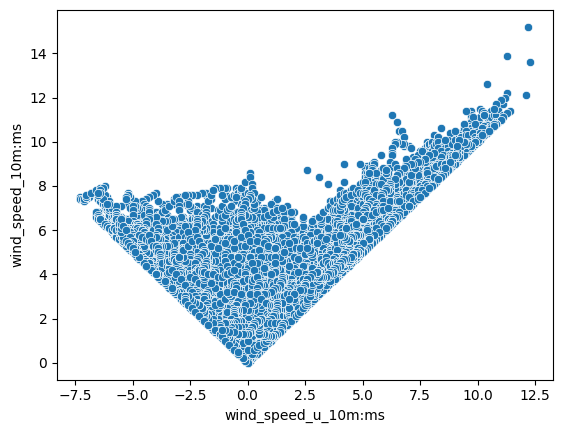

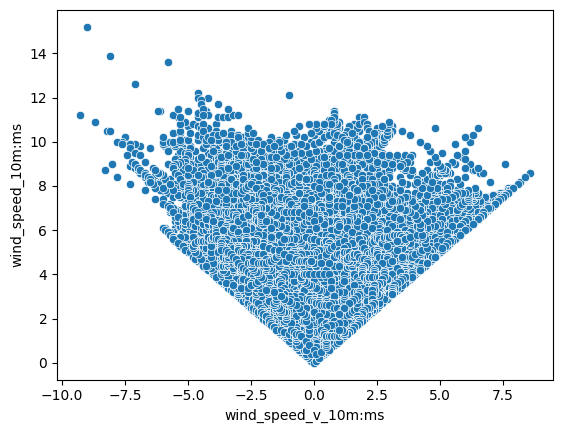

<Axes: xlabel='wind_speed_w_1000hPa:ms', ylabel='wind_speed_10m:ms'>

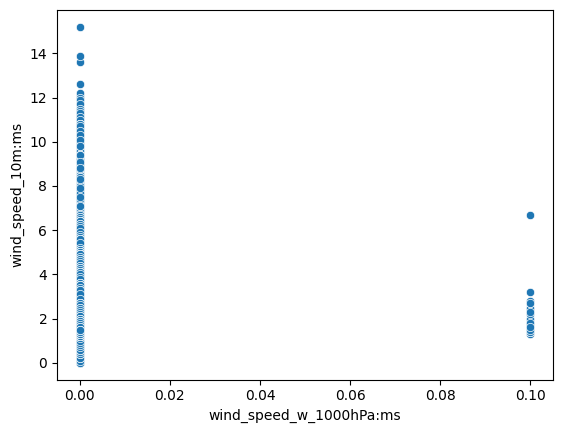

In [707]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=dm.X_train_observed_a["wind_speed_u_10m:ms"], y=dm.X_train_observed_a["wind_speed_10m:ms"])
plt.show()
sns.scatterplot(x=dm.X_train_observed_a["wind_speed_v_10m:ms"], y=dm.X_train_observed_a["wind_speed_10m:ms"])
plt.show()
sns.scatterplot(x=dm.X_train_observed_a["wind_speed_w_1000hPa:ms"], y=dm.X_train_observed_a["wind_speed_10m:ms"])

wind v indicates south -> north flow

wind u indicate west -> east flow

wind w indicate vertical wind, here at 1000hPa, we can drop this one as its both only zero values across all datasets (almost), and is not on the same format or amplitude as the previous two. 

The north/south and west/est flows are strongly correlated with the overall wind speed. We need to look into if the direction affects the measured pv in any way. Its probably redundant data, but we keep for now and remove later if needed. 

In [708]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("wind_speed_w_1000hPa:ms", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("wind_speed_w_1000hPa:ms", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("wind_speed_w_1000hPa:ms", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("wind_speed_w_1000hPa:ms", axis=1)


### Dew_or_rime:idx

Another index calue with alot of zeros. 

Dew or rime is an indicator for the probability of dew or rime forming on surfaces. In our case, the solar panels. From the dataset documentation we see that its strongly negative correlated with the radiation measures as the dew evaporates when exposed to sun. 
Rime is the frozen version of dew

In [709]:
print(dm.X_train_observed_a["dew_or_rime:idx"].corr(dm.X_train_observed_a["direct_rad:W"]))
print(dm.X_train_observed_a["dew_or_rime:idx"].corr(dm.X_train_observed_a["direct_rad_1h:J"]))

-0.05527366397226648
-0.05627703749955601


We dont see the expected correlation, this could be of several reasons. One; the low amount of snow indicates a warmer place, therefore no rime. Second; the prevelance of zeros indicate a dryer place. Since the majority of samples are zero (indicating neither dew nor rime) we dont see the expected correlation. 

We remove this as its not telling us anything usefull. 

In [710]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("dew_or_rime:idx", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("dew_or_rime:idx", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("dew_or_rime:idx", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("dew_or_rime:idx", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("dew_or_rime:idx", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("dew_or_rime:idx", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("dew_or_rime:idx", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("dew_or_rime:idx", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("dew_or_rime:idx", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("prob_rime:p", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("prob_rime:p", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("prob_rime:p", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("prob_rime:p", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("prob_rime:p", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("prob_rime:p", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("prob_rime:p", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("prob_rime:p", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("prob_rime:p", axis=1)


### Precip

Both the precip features (precip_type:idx, precip_type_5min:mm) contain mostly zero values. Again these are categorical. The 0 value indicates no type of downfall, again pointing to low amount of rain (and snow). Its now higly likely we are in some dry, sunny place with low amounts of downfall, and harldy any snow. And this makes sense due to the task being about solar panels. 

Anyways, we can see that the low amount of precip being anything other than zero is reflected in both the snow downfall and the rain_water:kgm2 features. 

Dont know how to handle for now, so we move on

## Sample rates, Aggregation

To make predictions, we need to make data appear on the same frequency. For us this means reducing the weather data from a per 15min sample rate to a per hour basis. This is because pv_measurement is sampled at an hourly rate.

How to do this is not immediatly obvious. Some features in our data makes sense to average over the last hour, getting to the right frequency. However, not all of them do. For instance, direct_rad is measured as an instantanious value at every 15min, for us this equates to us taking the mean over the past four rows. 

The is_day:idx however does not make sense to do this with, as its indicating wether or not its day. This has a value of 0 - 1 and averaging could make this become any of 0, 0.25, 0.5, 0.75, 1. 

When aggregating we therefore split into three categories. 1. Summation features, 2. mean features, 3. categorical features. 

In [711]:

def resample(df:pd.DataFrame): 

    sum_feature = ["date_forecast", "precip_5min:mm", "rain_water:kgm2", "snow_water:kgm2", "super_cooled_liquid_water:kgm2"]
    mean_feature = ["date_forecast", "absolute_humidity_2m:gm3", "air_density_2m:kgm3", "clear_sky_rad:W", "dew_point_2m:K", "clear_sky_rad:W", "diffuse_rad:W", "direct_rad:W", "effective_cloud_cover:p", "msl_pressure:hPa", "pressure_100m:hPa", "pressure_50m:hPa", "relative_humidity_1000hPa:p", "sfc_pressure:hPa", "sun_azimuth:d", "sun_elevation:d", "t_1000hPa:K", "total_cloud_cover:p", "visibility:m", "wind_speed_10m:ms", "wind_speed_u_10m:ms", "wind_speed_v_10m:ms", "cloud_base_agl"]
    categorical_feature = ["date_forecast", "is_day:idx", "is_in_shadow:idx", "precip_type_5min:idx", "cloud_base_agl:m", "clear_sky_energy_1h:J", "diffuse_rad_1h:J", "direct_rad_1h:J", "elevation:m", "fresh_snow_12h:cm", "fresh_snow_24h:cm"]

    categorical_set = df.loc[:, categorical_feature][::4].copy()

    resampled_set = df.resample('1H', on="date_forecast").agg({"precip_5min:mm":np.sum, "rain_water:kgm2":np.sum, "snow_water:kgm2":np.sum, "super_cooled_liquid_water:kgm2":np.sum, 
                                                                "absolute_humidity_2m:gm3":np.mean, "air_density_2m:kgm3":np.mean, "clear_sky_rad:W":np.mean, "dew_point_2m:K":np.mean, "clear_sky_rad:W":np.mean, "diffuse_rad:W":np.mean, "direct_rad:W":np.mean, "effective_cloud_cover:p":np.mean, "msl_pressure:hPa":np.mean, "pressure_100m:hPa":np.mean, "pressure_50m:hPa":np.mean, "relative_humidity_1000hPa:p":np.mean, "sfc_pressure:hPa":np.mean, "sun_azimuth:d":np.mean, "sun_elevation:d":np.mean, "t_1000hPa:K":np.mean, "total_cloud_cover:p":np.mean, "visibility:m":np.mean, "wind_speed_10m:ms":np.mean, "wind_speed_u_10m:ms":np.mean, "wind_speed_v_10m:ms":np.mean, "cloud_base_agl:m":np.mean})

    combined = pd.merge(categorical_set, resampled_set, how="left", on="date_forecast")

    print(combined.isna().sum().sum())
    return combined

dm.X_train_observed_a = resample(dm.X_train_observed_a)
dm.X_train_observed_b = resample(dm.X_train_observed_b)
dm.X_train_observed_c = resample(dm.X_train_observed_c)

dm.X_train_estimated_a = resample(dm.X_train_estimated_a)
dm.X_train_estimated_b = resample(dm.X_train_estimated_b)
dm.X_train_estimated_c = resample(dm.X_train_estimated_c)

dm.X_test_estimated_a = resample(dm.X_test_estimated_a)
dm.X_test_estimated_b = resample(dm.X_test_estimated_b)
dm.X_test_estimated_c = resample(dm.X_test_estimated_c)



0
0
0
0
0
0
0
0
0


## Combining datasets 

We now combine datasets to make it easier to do feature engineering and look at features role. 

In [712]:
def combine(obs:pd.DataFrame, es:pd.DataFrame, train:pd.DataFrame): 
    weather_data = pd.concat([obs, es], axis=0)

    data = pd.merge(weather_data, train, how="left", on="date_forecast")#.dropna().reset_index(drop=True)

    print(data.isna().sum().sum())

    return data

dm.data_A = combine(dm.X_train_observed_a, dm.X_train_estimated_a, dm.train_a)
dm.data_B = combine(dm.X_train_observed_b, dm.X_train_estimated_b, dm.train_b)
dm.data_C = combine(dm.X_train_observed_c, dm.X_train_estimated_c, dm.train_c)


1
808
7530


## Constant intervals

Plotting PV measurements for A B C shows some constant intervals. These would relate feature values with some (often wrong) measured pv value. We remove these.

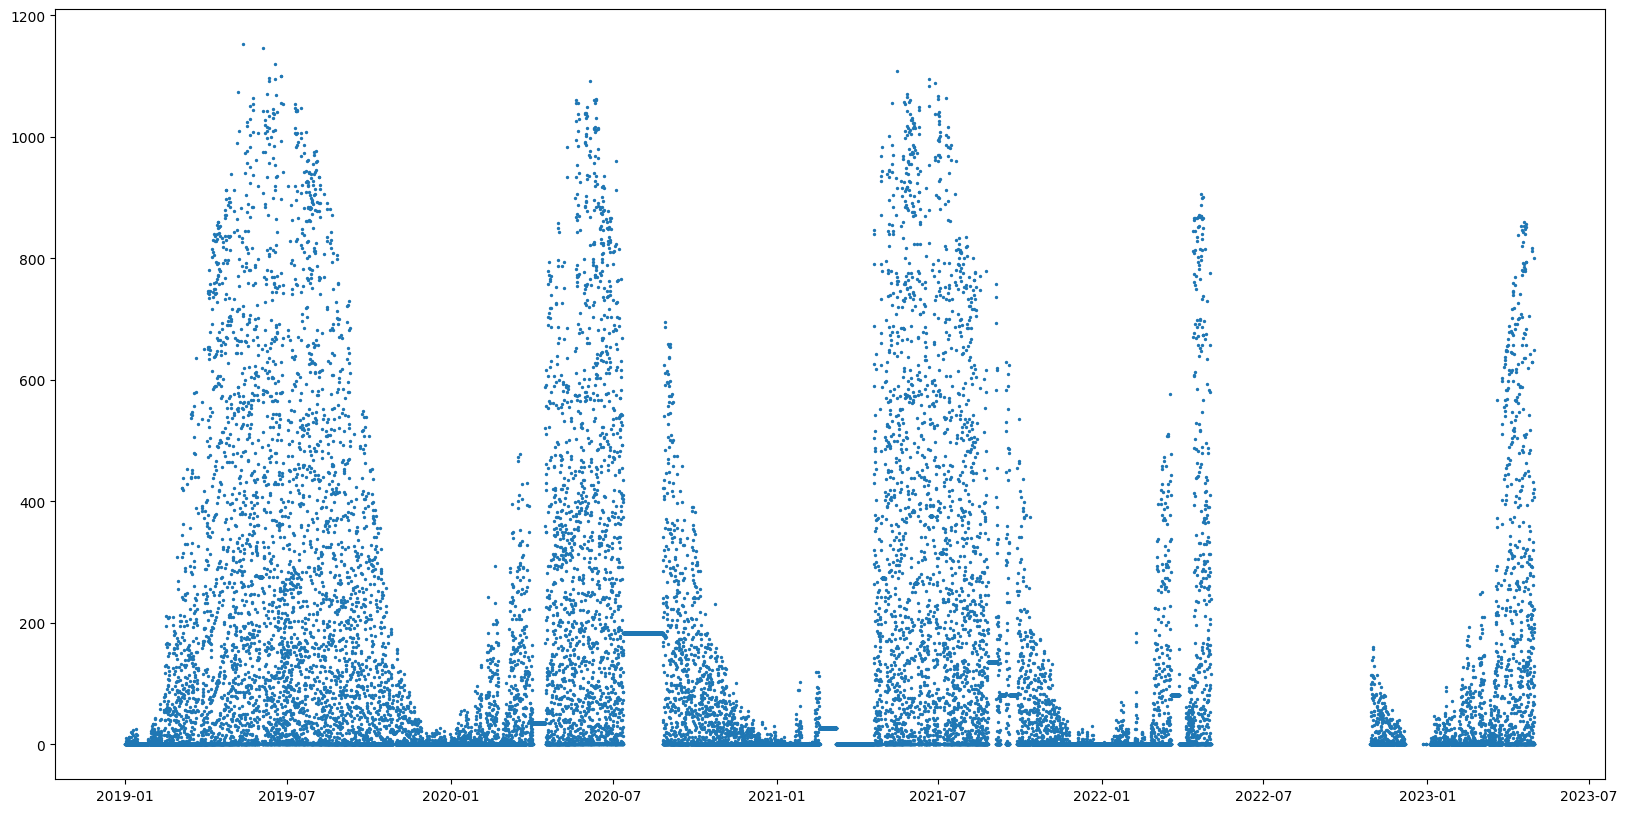

In [622]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.scatter(dm.data_B["date_forecast"], dm.data_B["pv_measurement"], s=2)


In [623]:
dm.remove_constant_periods(24)
dm.remove_constant_periods(3, [0])

y_train_a anomalies: 1
y_train_b anomalies: 57
y_train_c anomalies: 34
y_train_a anomalies: 0
y_train_b anomalies: 17
y_train_c anomalies: 59


In [624]:
print(dm.data_A.shape)
print(dm.data_B.shape)
print(dm.data_C.shape)

(34018, 37)
(25726, 37)
(20906, 37)


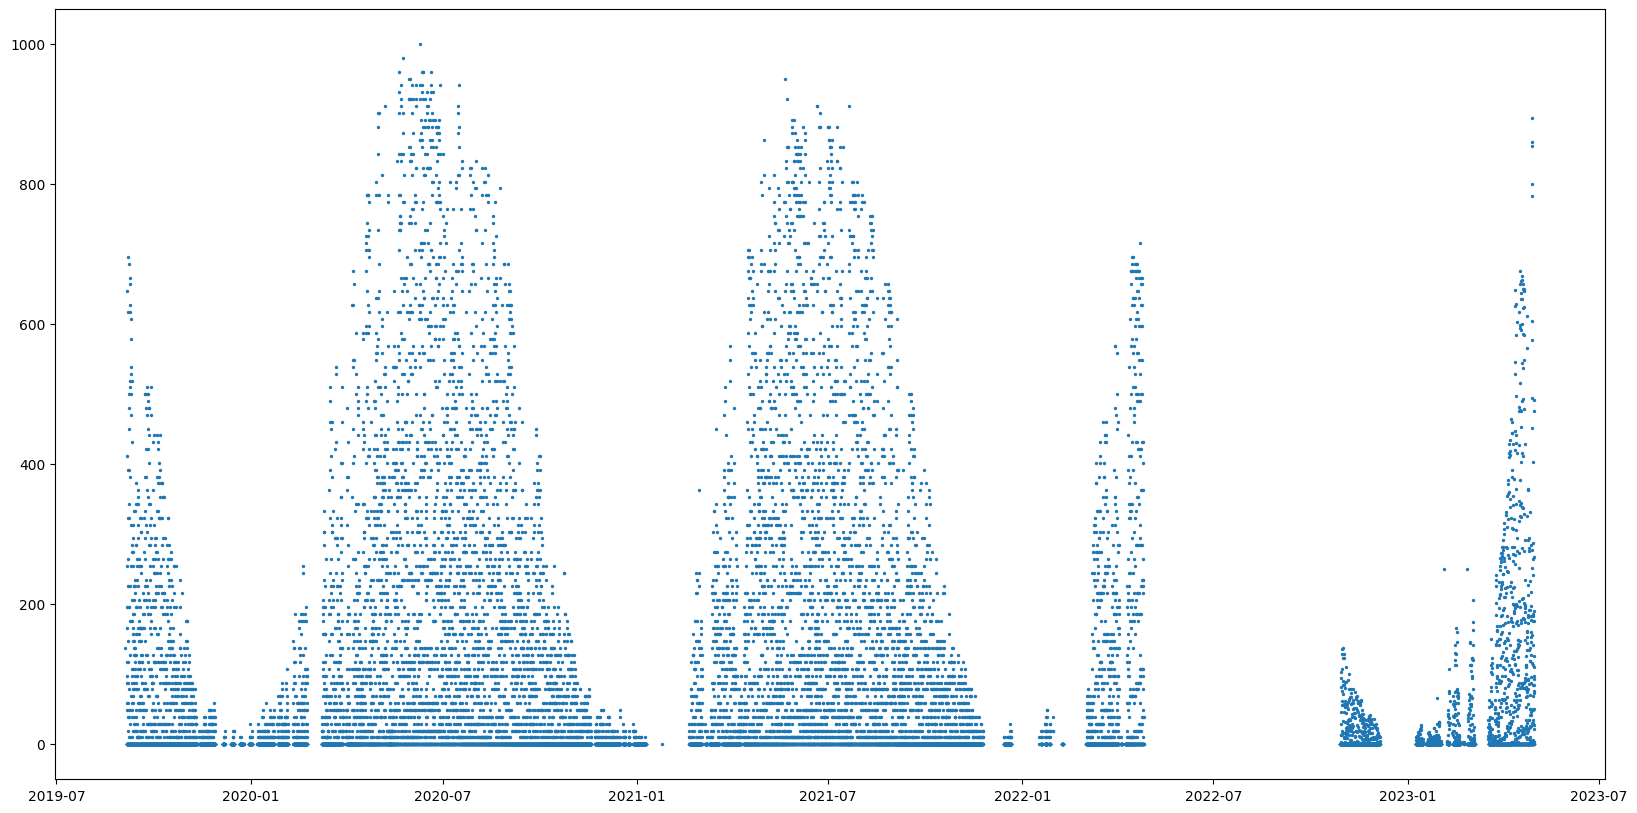

In [626]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(dm.data_C["date_forecast"], dm.data_C["pv_measurement"], s=2)